# 군집화를 통한 labeling

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN


df = pd.read_csv('./data.csv',encoding = 'euc-kr')
df.columns = ['singer']+[x for x in range(len(df.columns)-1)]
name = df['singer']
del df['singer']
df.shape

(126, 20)

## Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)
scaled_X = scale.transform(df)

In [2]:
scaled_X = df

## DBSCAN

In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=2) #기본값이다.
cluster = dbscan.fit_predict(scaled_X)
df["cluster"] = cluster
print(df)
df["cluster"] ==0

## K-MEANS

### Scree plot

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.savefig('fig.png', dpi=300)
    plt.show()
    

elbow(scaled_X)


<Figure size 640x480 with 1 Axes>

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 6
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(scaled_X)
predict = pd.DataFrame(model.predict(scaled_X))
predict.columns=['predict']

print(predict)
count=[]
for i in range(k):
    count.append(sum(predict['predict']==i))

string = 'abcdefg'
    
for i in range(k):
    print('{}번째 군집은 {}개'.format(i+1,count[i]))
    predict['predict'] = predict['predict'].replace(i,string[i])

     predict
0          3
1          5
2          0
3          3
4          5
..       ...
121        0
122        0
123        2
124        3
125        5

[126 rows x 1 columns]
1번째 군집은 29개
2번째 군집은 9개
3번째 군집은 19개
4번째 군집은 22개
5번째 군집은 11개
6번째 군집은 36개


## Ploting by PCA 

         pc1      pc2  singer cluster
0    68.6552 -17.6905    10cm       d
1    25.0651 -40.2164    Buzz       f
2   -73.0192 -15.9377   Crush       a
3    80.8877 -4.98257  K.Will       d
4    9.60738  -27.855     KCM       f
..       ...      ...     ...     ...
121 -38.5323 -32.5468      환희       a
122 -59.9446   3.5453     황인욱       a
123 -9.76379  12.5374      효린       c
124  103.407  30.6232      휘성       d
125   1.0248 -51.8263      휘인       f

[126 rows x 4 columns]


,pc1,pc2,singer,cluster
2,-73.0192,-15.9377,Crush,a
7,-30.6701,-29.4859,거미,a
13,-48.7672,-21.0268,김범수,a
14,-27.0337,-9.92052,김연우,a
18,-44.1946,-32.9843,김조한,a
20,-42.6453,-0.0801593,김태우,a
26,-53.6777,0.302432,럼블피쉬,a
28,-71.0867,7.28028,린,a
32,-32.5407,-3.25566,바비킴,a
51,-31.6462,1.30757,성시경,a


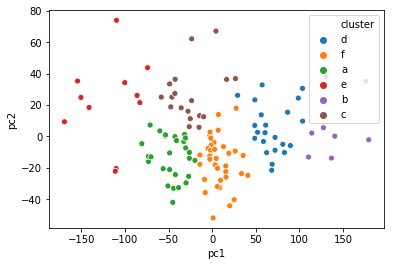

In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np


#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled_X)
new = np.c_[pc,name, predict]
df  = pd.DataFrame(new,columns=['pc1','pc2','singer','cluster'])
print(df)

#polting
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2',hue = 'cluster',data =df)
plt.savefig('fig3.png', dpi=300)
df[df['cluster']=='a']

## 3차원에서 보았을 떄

          pc1       pc2        pc3  singer cluster
0     1.64233     4.053  0.0116876    10cm       d
1     -3.1049   1.48548 -0.0813655    Buzz       c
2   -0.173918  -1.57179  -0.477352   Crush       e
3    -1.58231  0.584262   0.883666  K.Will       f
4    -2.26485 -0.502802    1.26135     KCM       f
..        ...       ...        ...     ...     ...
121  -2.97546  -1.01482    1.96376      환희       c
122  0.976548  -1.61079   0.201313     황인욱       e
123   1.28211  -1.08928  -0.942743      효린       e
124 -0.953835 -0.166191    1.82922      휘성       f
125  -2.07434    2.2191   -3.27581      휘인       b

[126 rows x 5 columns]


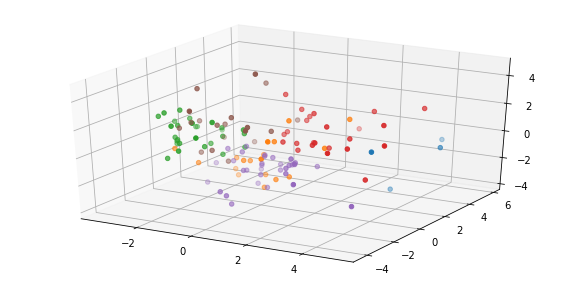

In [30]:
from sklearn.preprocessing import StandardScaler
import numpy as np


#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pc = pca.fit_transform(scaled_X)
new = np.c_[pc,name, predict]
df  = pd.DataFrame(new,columns=['pc1','pc2','pc3','singer','cluster'])
print(df)

#polting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') 

for i in string:
    temp = df[df['cluster'] ==i] 
    ax.scatter(temp['pc1'],temp['pc2'],temp['pc3'])
plt.savefig('fig4.png', dpi=300)


